In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def show_img(image, gray = False):
    if gray == True:
        plt.imshow(image,cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')
    plt.show()

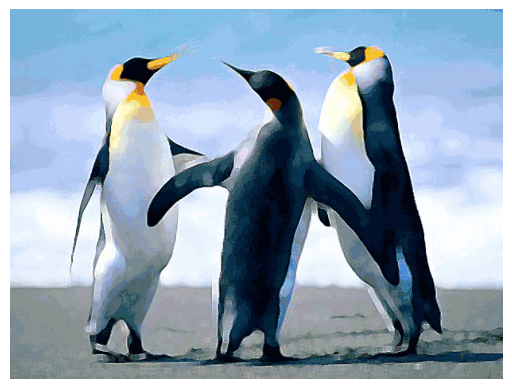

In [3]:
penguin = cv2.imread("penguin.png")

penguin = cv2.cvtColor(penguin, cv2.COLOR_BGR2RGB)
show_img(penguin)

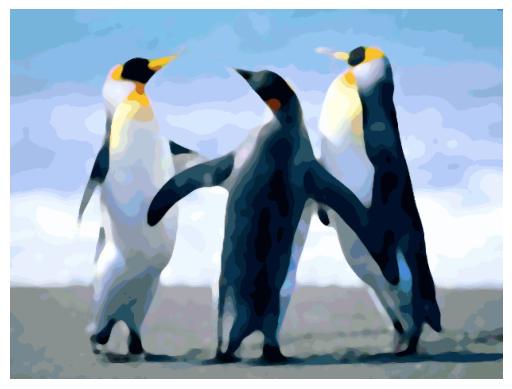

In [4]:
def median_blur(image, kernel_size):
    assert kernel_size in [3,5,7,9], "O tamanho do filtro deve estar entre 3,5,7,9"
    mb = cv2.medianBlur(image, kernel_size)
    return mb

mb = median_blur(penguin, 9)
show_img(mb)

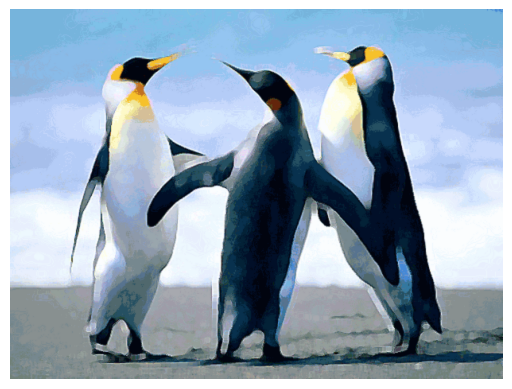

In [5]:
def gaussian_blur(image, std, ksize = 5):
    assert 0<=std<=1, "o desvio padrão do filtro deve estar entre 0 e 1"
    gb = cv2.GaussianBlur(image, (ksize, ksize), std)
    return gb

gb = gaussian_blur(penguin, 0.5)
show_img(gb)


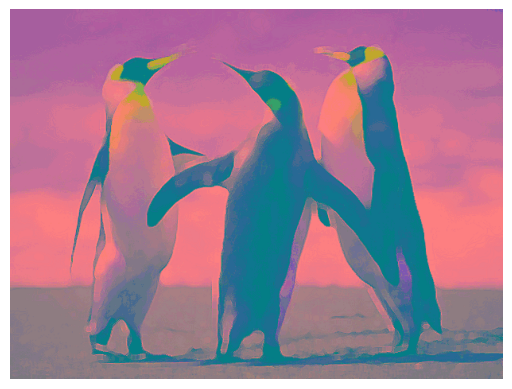

In [6]:
def color_space(image, transformation):
    if transformation == 0:
        cs = image
    elif transformation == 1:
        cs = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    elif transformation == 2:
        cs = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    elif transformation == 3:
        cs = cv2.cvtColor(image, cv2.COLOR_RGB2XYZ)
    elif transformation == 4:
        cs = cv2.cvtColor(image, cv2.COLOR_RGB2YCR_CB)
    return cs
cs = color_space(penguin, 4)
show_img(cs)

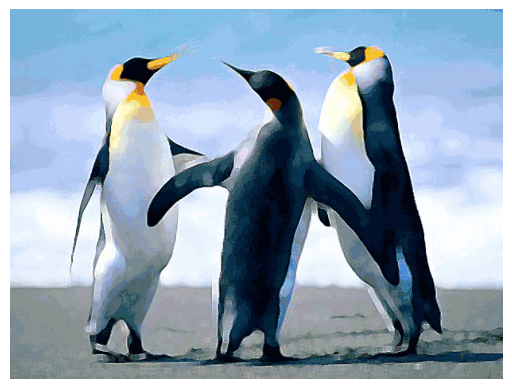

In [7]:
def choose_channel(image, channel):
    if channel == 0:
        cc = image
    elif channel == 1:
        cc = image[:,:,0]
    elif channel == 2:
        cc = image[:,:,1]
    elif channel == 3:
        cc = image[:,:,2]
    return cc

cc = choose_channel(penguin, 0)
show_img(cc)

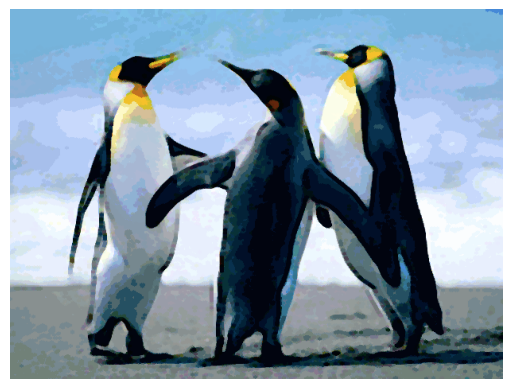

In [8]:
def erode(image, size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
    e = cv2.erode(image, kernel, iterations=1)
    return e

e = erode(penguin, 5)
show_img(e)

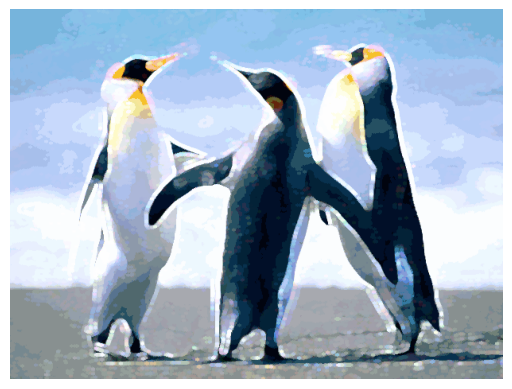

In [9]:
def dilate(image, size):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (size, size))
    d = cv2.dilate(image, kernel, iterations=1)
    return d

d = dilate(penguin, 5)
show_img(d)

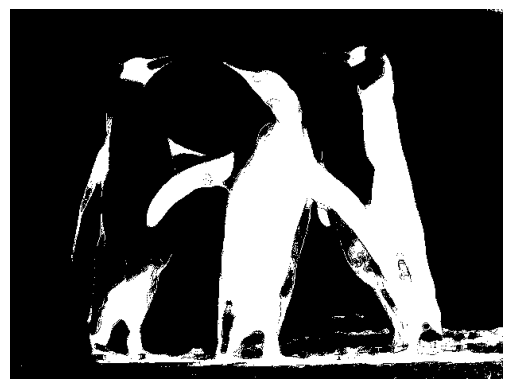

In [49]:
def segmentation(image, segmentation_type):
    if segmentation_type == 0: #OTSU
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        ret, bit_mask = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    elif segmentation_type == 1: #kmeans
        vectorized = image.reshape((-1,3)) 
        vectorized = np.float32(vectorized)

        attempts = 10
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.9)

        ret,label,center = cv2.kmeans(vectorized,2,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

        bit_mask = label.reshape((image.shape[:2]))
        bit_mask = cv2.normalize(bit_mask.astype('float32'), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        bit_mask = bit_mask.astype(np.uint8)
        
    elif segmentation_type == 2: #adaptive threshold
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        bit_mask = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
            
    elif segmentation_type == 3:
        matrix = image.reshape((-1, 3)).astype(np.float32)
        
        mean_matrix = np.mean(matrix, axis=0)
        
        centered_matrix = matrix - mean_matrix
        
        cov_matrix = np.cov(centered_matrix, rowvar=False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        max_arg = np.argmax(eigenvalues)
        top_eigenvector = eigenvectors[max_arg]
        
        projected_data = np.dot(centered_matrix, top_eigenvector)
        
        projected_image = projected_data.reshape((image.shape[:2]))
        pca_image = cv2.normalize(projected_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        
        ret, bit_mask = cv2.threshold(pca_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    return bit_mask

bit_mask = segmentation(penguin, 3)
show_img(bit_mask, gray = True)